In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import * 
from statistics import *
from collections import *
from itertools import *

In [19]:
DF=pd.read_csv('Flipkart AC EDA.csv')

In [20]:
DF.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
DF.columns

Index(['Brands', 'Ton', 'Star', 'Type', 'Color', 'Condenser_Coil', 'Noise(dB)',
       'Noise(dB)_Range', 'Power_Consumption(kWh)', 'Power_Range(kWh)',
       'Refrigerant', 'Wi_Fi Enabled', 'Product_Warranty(Years)',
       'PCB_Warranty(Years)', 'Compressor_Warranty(Years)',
       'Condenser_Warranty(Years)', 'ODU_Casing_Warranty(Years)',
       'Ratings_Count', 'Reviews_Count', 'Avg_star', 'Avg_star_Range',
       'Offer_Price(₹)', 'Offer_Price_Range(₹)', 'Actual_Price(₹)',
       'Act_Price_Range(₹)', 'Discount(%)', 'Merged', 'Types'],
      dtype='object')

Text(0.5, 1.0, 'Noise(dB)-Types')

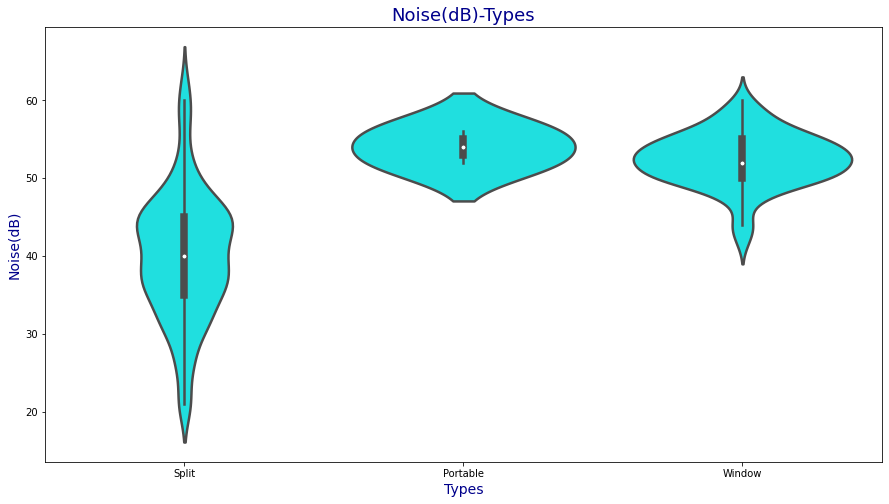

In [51]:
plt.figure(figsize=(15,8))
sns.violinplot(y=DF['Noise(dB)'],color='cyan',x=DF['Types'],showmeans=True,meanprops={"marker": "+","markeredgecolor": "",
                       "markersize": "30"},linewidth=2.5)
plt.ylabel('Noise(dB)',fontsize=14,color='darkblue')
plt.xlabel('Types',fontsize=14,color='darkblue')
plt.title('Noise(dB)-Types',fontsize=18,color='darkblue')


C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Noise(dB)')

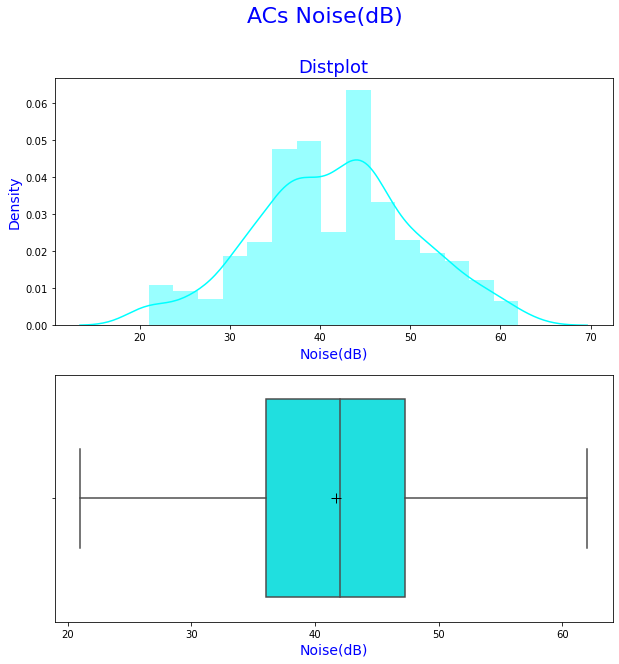

In [53]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(DF['Noise(dB)'],color='cyan')
plt.xlabel('Noise(dB)',fontsize=14,color='blue')
plt.ylabel('Density',fontsize=14,color='blue')
plt.title('Distplot',fontsize=18,color='blue')
plt.suptitle('ACs Noise(dB)',fontsize=22,color='blue')

plt.subplot(2,1,2)
sns.boxplot(DF['Noise(dB)'],color='cyan',showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Noise(dB)',fontsize=14,color='blue')
# plt.title('Boxplot',fontsize=18,color='blue')


<AxesSubplot:xlabel='Type-Ton-Star'>

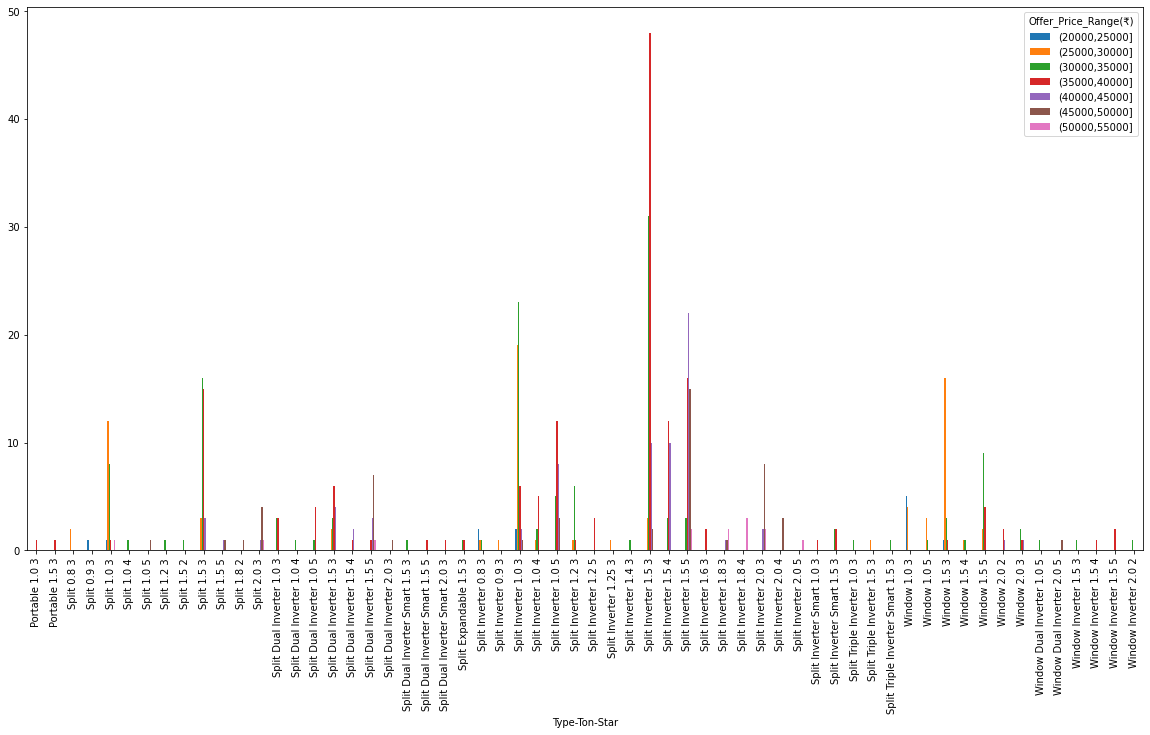

In [22]:
DF['Type-Ton-Star']=DF['Type']+' '+DF['Ton'].astype(str)+' '+DF['Star'].astype(str)
pd.crosstab(DF['Type-Ton-Star'],DF['Offer_Price_Range(₹)']).plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Type-Ton-Star'>

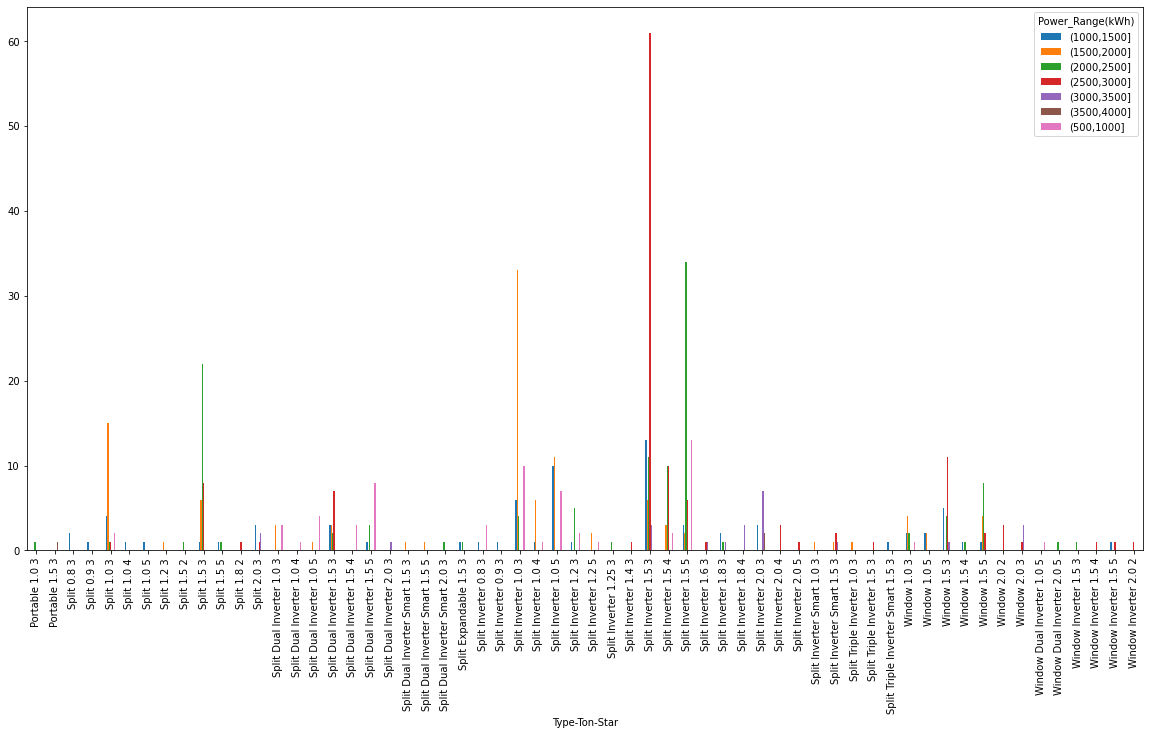

In [23]:
DF['Type-Ton-Star']=DF['Type']+' '+DF['Ton'].astype(str)+' '+DF['Star'].astype(str)
pd.crosstab(DF['Type-Ton-Star'],DF['Power_Range(kWh)']).plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Type-Ton-Star'>

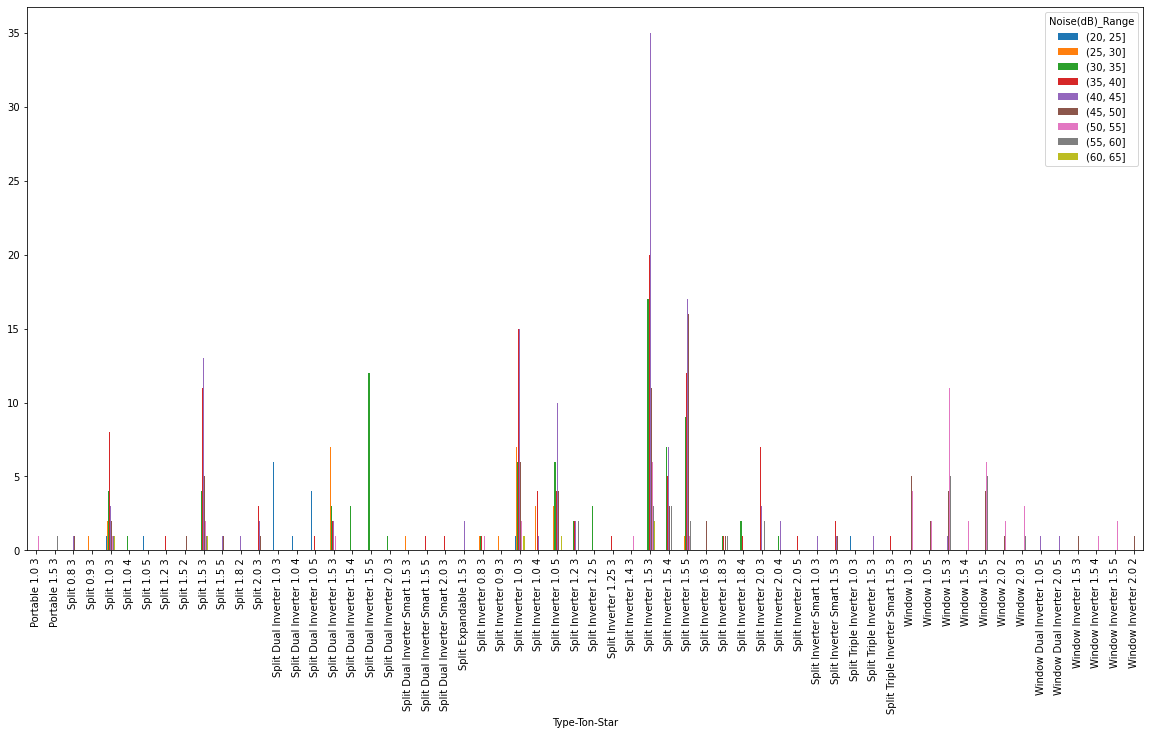

In [24]:
DF['Type-Ton-Star']=DF['Type']+' '+DF['Ton'].astype(str)+' '+DF['Star'].astype(str)
pd.crosstab(DF['Type-Ton-Star'],DF['Noise(dB)_Range']).plot(kind='bar',figsize=(20,10))

In [25]:
Ton=list(DF['Ton'].unique())
Star=list(DF['Star'].unique())
Type=list(DF['Type'].unique())
Brands=list(DF['Brands'].unique())
Power_Range=list(DF['Power_Range(kWh)'].unique())
Offer_Price_Range=list(DF['Offer_Price_Range(₹)'].unique())
Avg_star_Range=list(DF['Avg_star_Range'].unique())
Noise_Range=list(DF['Noise(dB)_Range'].unique())
Condenser_Coil=list(DF['Condenser_Coil'].unique())
Refrigerant=list(DF['Refrigerant'].unique())

In [26]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star'])['Offer_Price(₹)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Price.xlsx')

In [45]:
d = DF4.groupby(['Type', 'Ton', 'Star'])['Offer_Price(₹)'].agg(['min']).round()

In [46]:
d = d.reset_index()
d.columns = ['Type', 'Ton', 'Star', 'Offer_Price(₹)']
d.head()

,Type,Ton,Star,Offer_Price(₹)
0,Portable,1.0,3,35490.0
1,Portable,1.5,3,39990.0
2,Split,0.8,3,26999.0
3,Split,0.9,3,24990.0
4,Split,1.0,3,24999.0


In [48]:
d.merge(DF4, on=['Type', 'Ton', 'Star', 'Offer_Price(₹)'], how='inner')

,Type,Ton,Star,Offer_Price(₹),Brands
0,Portable,1.0,3,35490.0,Blue Star
1,Portable,1.5,3,39990.0,Croma
2,Split,0.8,3,26999.0,Voltas
3,Split,0.8,3,26999.0,Daikin
4,Split,0.9,3,24990.0,Haier
...,...,...,...,...,...
59,Window Dual Inverter,2.0,5,48490.0,Lg
60,Window Inverter,1.5,3,32490.0,Hitachi
61,Window Inverter,1.5,4,36800.0,Blue Star
62,Window Inverter,1.5,5,36290.0,Croma


In [57]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Power_Range:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Power_Range(kWh)']==l))][['Type','Ton','Star','Power_Range(kWh)','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

k=DF4.groupby(['Type', 'Ton', 'Star','Power_Range(kWh)'])['Offer_Price(₹)'].agg(['min']).round()
k = k.reset_index()
k.columns = ['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price(₹)']
k.merge(DF4,on=['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price(₹)'],how='inner').to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Cheap AC Type Ton Star Power Range.xlsx')

In [60]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Power_Range:
                for m in Offer_Price_Range:
                    DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Power_Range(kWh)']==l)&(DF['Offer_Price_Range(₹)']==m))][['Type','Ton','Star','Power_Range(kWh)','Offer_Price_Range(₹)','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

k=DF4.groupby(['Type', 'Ton', 'Star','Power_Range(kWh)','Offer_Price_Range(₹)'])['Offer_Price(₹)'].agg(['min']).round()
k = k.reset_index()
k.columns = ['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price_Range(₹)','Offer_Price(₹)']
k.merge(DF4,on=['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price_Range(₹)','Offer_Price(₹)'],how='inner').to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Cheap AC Type Ton Star Power Range Price Range.xlsx')

In [61]:
DF['Noise(dB)_Range'].unique()

array(['(45, 50]', '(30, 35]', '(35, 40]', '(50, 55]', '(40, 45]',
       '(55, 60]', '(25, 30]', '(20, 25]', '(60, 65]'], dtype=object)

In [64]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Power_Range:
                for m in Offer_Price_Range:
                    for n in ['(20, 25]','(25, 30]','(30, 35]','(35, 40]']:
                        DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Power_Range(kWh)']==l)&(DF['Offer_Price_Range(₹)']==m)&(DF['Noise(dB)_Range']==n))][['Type','Ton','Star','Power_Range(kWh)','Offer_Price_Range(₹)','Noise(dB)_Range','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

k=DF4.groupby(['Type', 'Ton', 'Star','Power_Range(kWh)','Offer_Price_Range(₹)','Noise(dB)_Range'])['Offer_Price(₹)'].agg(['min']).round()
k = k.reset_index()
k.columns = ['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price_Range(₹)','Noise(dB)_Range','Offer_Price(₹)']
k.merge(DF4,on=['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price_Range(₹)','Noise(dB)_Range','Offer_Price(₹)'],how='inner').to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Cheap AC Type Ton Star Power Price Noise Range.xlsx')

In [65]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Power_Range:
                for m in Offer_Price_Range:
                    for n in ['(3.5,4.0]','(4.0,4.5]','(4.5,5.0]']:
                        DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Power_Range(kWh)']==l)&(DF['Offer_Price_Range(₹)']==m)&(DF['Avg_star_Range']==n))][['Type','Ton','Star','Power_Range(kWh)','Offer_Price_Range(₹)','Avg_star_Range','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

k=DF4.groupby(['Type', 'Ton', 'Star','Power_Range(kWh)','Offer_Price_Range(₹)','Avg_star_Range'])['Offer_Price(₹)'].agg(['min']).round()
k = k.reset_index()
k.columns = ['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price_Range(₹)','Avg_star_Range','Offer_Price(₹)']
k.merge(DF4,on=['Type', 'Ton', 'Star','Power_Range(kWh)', 'Offer_Price_Range(₹)','Avg_star_Range','Offer_Price(₹)'],how='inner').to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Cheap AC Type Ton Star Power Price Avg Star Range.xlsx')

In [11]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star'])['Offer_Price(₹)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Price.xlsx')

In [12]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Power_Consumption(kWh)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star'])['Power_Consumption(kWh)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Power.xlsx')

In [54]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Noise(dB)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star'])['Noise(dB)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Noise.xlsx')

In [13]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Brands:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Brands']==l))][['Type','Ton','Star','Brands','Offer_Price(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star','Brands'])['Offer_Price(₹)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Brand Type Ton Star Price.xlsx')

In [14]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Brands:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Brands']==l))][['Type','Ton','Star','Brands','Power_Consumption(kWh)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star','Brands'])['Power_Consumption(kWh)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Brand Type Ton Star Power.xlsx')

In [49]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Brands:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Brands']==l))][['Type','Ton','Star','Brands','Offer_Price(₹)','Power_Consumption(kWh)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star','Brands']).agg({'Offer_Price(₹)':'min','Power_Consumption(kWh)':'min'}).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Brand Type Ton Star Price Power.xlsx')

In [50]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Brands:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Brands']==l))][['Type','Ton','Star','Brands','Offer_Price(₹)','Power_Consumption(kWh)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star']).agg({'Offer_Price(₹)':'min','Power_Consumption(kWh)':'min'}).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Price Power Brand.xlsx')
e=DF4.groupby(['Type', 'Ton', 'Star']).agg({'Offer_Price(₹)':'min','Power_Consumption(kWh)':'min'})
e = e.reset_index()
e.columns = ['Type', 'Ton', 'Star', 'Offer_Price(₹)','Power_Consumption(kWh)']
e.merge(DF4, on=['Type', 'Ton', 'Star', 'Offer_Price(₹)','Power_Consumption(kWh)'], how='inner').to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Best AC selection.xlsx')

In [15]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Offer_Price_Range(₹)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star','Offer_Price_Range(₹)'])['Offer_Price_Range(₹)'].count().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Price Range.xlsx')

In [16]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Power_Range(kWh)']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star','Power_Range(kWh)'])['Power_Range(kWh)'].count().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Power Range.xlsx')

In [17]:
DF2=[]
for i in Type:
    for j in Ton:
        for k in Star:
                DF2.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k))][['Type','Ton','Star','Brands','Noise(dB)_Range']])
DF3=[]
DF4=[]
for i in range(len(DF2)):
    if len(DF2[i])>0:
        DF3.append(DF2[i])
for i in range(len(DF3)-1):
    DF4=DF3[i+1].append(DF3[i])   
    DF3[i+1]=DF4

DF4.groupby(['Type', 'Ton', 'Star','Noise(dB)_Range'])['Noise(dB)_Range'].count().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Noise Range.xlsx')

In [ ]:
DF5=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Power_Range:
                DF5.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Power_Range(kWh)']==l))][['Type','Ton','Star','Power_Range(kWh)','Brands','Offer_Price(₹)']])
DF6=[]
DF7=[]
for i in range(len(DF5)):
    if len(DF5[i])>0:
        DF6.append(DF5[i])
for i in range(len(DF6)-1):
    DF7=DF6[i+1].append(DF6[i])   
    DF6[i+1]=DF7

DF7.groupby(['Type', 'Ton', 'Star','Power_Range(kWh)'])['Offer_Price(₹)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Power Range Price.xlsx')

In [184]:
DF8=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Condenser_Coil:
                DF8.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Condenser_Coil']==l))][['Type','Ton','Star','Condenser_Coil','Brands','Offer_Price(₹)']])
DF9=[]
DF10=[]
for i in range(len(DF8)):
    if len(DF8[i])>0:
        DF9.append(DF8[i])
for i in range(len(DF9)-1):
    DF10=DF9[i+1].append(DF9[i])   
    DF9[i+1]=DF10

DF10.groupby(['Type', 'Ton', 'Star','Condenser_Coil'])['Offer_Price(₹)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Cond Ton Star Price.xlsx')

In [209]:
DF8=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Condenser_Coil:
                DF8.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Condenser_Coil']==l))][['Type','Ton','Star','Condenser_Coil','Brands','Power_Consumption(kWh)']])
DF9=[]
DF10=[]
for i in range(len(DF8)):
    if len(DF8[i])>0:
        DF9.append(DF8[i])
for i in range(len(DF9)-1):
    DF10=DF9[i+1].append(DF9[i])   
    DF9[i+1]=DF10

DF10.groupby(['Type', 'Ton', 'Star','Condenser_Coil'])['Power_Consumption(kWh)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Cond Ton Star Power.xlsx')

In [191]:
DF8=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Refrigerant:
                DF8.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Refrigerant']==l))][['Type','Ton','Star','Refrigerant','Brands','Offer_Price(₹)']])
DF9=[]
DF10=[]
for i in range(len(DF8)):
    if len(DF8[i])>0:
        DF9.append(DF8[i])
for i in range(len(DF9)-1):
    DF10=DF9[i+1].append(DF9[i])   
    DF9[i+1]=DF10

DF10.groupby(['Type', 'Ton', 'Star','Refrigerant'])['Offer_Price(₹)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Refrig Price.xlsx')

In [212]:
DF8=[]
for i in Type:
    for j in Ton:
        for k in Star:
            for l in Refrigerant:
                DF8.append(DF[((DF['Type']==i)&(DF['Ton']==j)&(DF['Star']==k)&(DF['Refrigerant']==l))][['Type','Ton','Star','Refrigerant','Brands','Power_Consumption(kWh)']])
DF9=[]
DF10=[]
for i in range(len(DF8)):
    if len(DF8[i])>0:
        DF9.append(DF8[i])
for i in range(len(DF9)-1):
    DF10=DF9[i+1].append(DF9[i])   
    DF9[i+1]=DF10

DF10.groupby(['Type', 'Ton', 'Star','Refrigerant'])['Power_Consumption(kWh)'].agg(['min','median','mean','max']).round().to_excel('E:\KIRAN\INNOMATICS\Web Scrapping Project Files\Type Ton Star Refrig Power.xlsx')